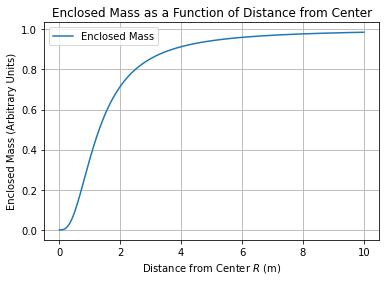

In [46]:
#Q1

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the density function
def density_function(r, constant):
    return (constant * r**2) /((1 + r**2)**(5/2))

# Define the constant in the density function
constant = 3.0

# Define the function to calculate the enclosed mass
def enclosed_mass(R):
    result, _ = quad(density_function, 0, R, args=(constant,))
    return result

# Create an array of distance values from 0 to 10 meters
R_values = np.linspace(0, 10, 1000)

# Calculate the enclosed mass for each distance value
mass_values = np.vectorize(enclosed_mass)(R_values)

# Plot the results
plt.plot(R_values, mass_values, label='Enclosed Mass')
plt.xlabel('Distance from Center $R$ (m)')
plt.ylabel('Enclosed Mass (Arbitrary Units)')
plt.title('Enclosed Mass as a Function of Distance from Center')
plt.legend()
plt.grid(True)
plt.show()


For theta = 3, interpolated d = -1.726298886346519


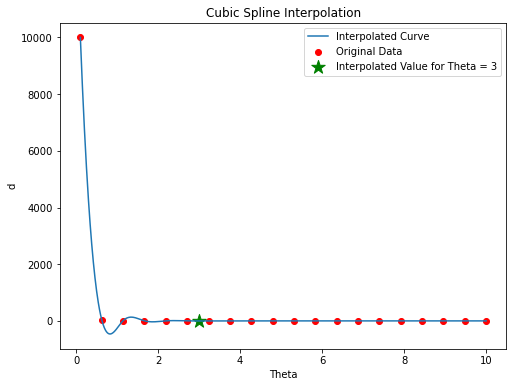

In [50]:
#Q5 using cubic spline interpolation parts a and b

import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

def interpolate_d(theta_value):
    # Provided data
    data = """
    0.100000  1.000000e+04
    0.621053  4.174599e+01
    1.142105  6.712458e+00
    1.663158  2.173700e+00
    2.184211  9.596581e-01
    2.705263  5.050931e-01
    3.226316  2.977689e-01
    3.747368  1.900294e-01
    4.268421  1.285873e-01
    4.789474  9.101996e-02
    5.310526  6.677091e-02
    5.831579  5.042449e-02
    6.352632  3.900668e-02
    6.873684  3.079153e-02
    7.394737  2.473044e-02
    7.915789  2.016124e-02
    8.436842  1.665176e-02
    8.957895  1.391176e-02
    9.478947  1.174139e-02
    10.000000  1.000000e-02
    """

    # Parse the data into arrays
    lines = data.strip().split('\n')
    theta, d = zip(*(map(float, line.split()) for line in lines))
    theta = np.array(theta)
    d = np.array(d)

    # Create a CubicSpline object
    cs = CubicSpline(theta, d)

    # Interpolate the value of d for the given theta_value
    interpolated_d = cs(theta_value)

    return theta, d, interpolated_d

# Example usage
arbitrary_theta = 3  # Replace with the desired theta value
theta, d, interpolated_d = interpolate_d(arbitrary_theta)

print(f'For theta = {arbitrary_theta}, interpolated d = {interpolated_d}')

# Plotting
theta_values = np.linspace(0.1, 10, 1000)
theta, d, interpolated_d_values = interpolate_d(theta_values)

plt.figure(figsize=(8, 6))
plt.plot(theta_values, interpolated_d_values, label='Interpolated Curve')
plt.scatter(theta, d, c='red', marker='o', label='Original Data')
plt.scatter(arbitrary_theta, interpolated_d, c='green', marker='*', label=f'Interpolated Value for Theta = {arbitrary_theta}', s=200)
plt.xlabel('Theta')
plt.ylabel('d')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()


In [51]:
#Q5 using cubic spline interpolation part c

import numpy as np
from scipy.interpolate import CubicSpline
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

def interpolate_d(theta_value):
    # Provided data
    data = """
    0.100000  1.000000e+04
    0.621053  4.174599e+01
    1.142105  6.712458e+00
    1.663158  2.173700e+00
    2.184211  9.596581e-01
    2.705263  5.050931e-01
    3.226316  2.977689e-01
    3.747368  1.900294e-01
    4.268421  1.285873e-01
    4.789474  9.101996e-02
    5.310526  6.677091e-02
    5.831579  5.042449e-02
    6.352632  3.900668e-02
    6.873684  3.079153e-02
    7.394737  2.473044e-02
    7.915789  2.016124e-02
    8.436842  1.665176e-02
    8.957895  1.391176e-02
    9.478947  1.174139e-02
    10.000000  1.000000e-02
    """

    # Parse the data into arrays
    lines = data.strip().split('\n')
    theta, d = zip(*(map(float, line.split()) for line in lines))
    theta = np.array(theta)
    d = np.array(d)

    # Create a CubicSpline object
    cs = CubicSpline(theta, d)

    # Interpolate the value of d for the given theta_value
    interpolated_d = cs(theta_value)

    return interpolated_d

# Function to find the root: f(theta) - d
def root_function(theta):
    return interpolate_d(theta) - 370.4

# Use root_scalar to find the root
result = root_scalar(root_function, bracket=[0.1, 10])

if result.converged:
    corresponding_theta = result.root
    print(f'Corresponding Theta for d = 370.4: {corresponding_theta}')
else:
    print('Root finding algorithm did not converge.')


Corresponding Theta for d = 370.4: 0.5707722851547311


In [52]:
#Q5 using linear spline interpolation part a
from scipy.interpolate import interp1d

def interpolate_d(theta_value):
    # Given data
    theta = [0.100000, 0.621053, 1.142105, 1.663158, 2.184211, 2.705263, 3.226316, 3.747368, 4.268421, 4.789474, 5.310526, 5.831579, 6.352632, 6.873684, 7.394737, 7.915789, 8.436842, 8.957895, 9.478947, 10.000000]
    d = [1.000000e+04, 4.174599e+01, 6.712458e+00, 2.173700e+00, 9.596581e-01, 5.050931e-01, 2.977689e-01, 1.900294e-01, 1.285873e-01, 9.101996e-02, 6.677091e-02, 5.042449e-02, 3.900668e-02, 3.079153e-02, 2.473044e-02, 2.016124e-02, 1.665176e-02, 1.391176e-02, 1.174139e-02, 1.000000e-02]

    # Linear spline interpolation
    interp_function = interp1d(theta, d, kind='linear', fill_value="extrapolate")

    # Interpolate the given theta_value
    interpolated_d = interp_function(theta_value)
    
    return interpolated_d

# Example usage
theta_value = 3.0  # You can replace this with any arbitrary value between 0.1 and 10
result = interpolate_d(theta_value)
print(f"For theta = {theta_value}, interpolated d = {result}")


For theta = 3.0, interpolated d = 0.38781882514619437


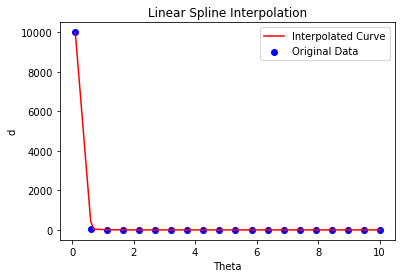

In [53]:
#Q5 using linear spline interpolation part b
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def interpolate_d(theta_value):
    # Given data
    theta = [0.100000, 0.621053, 1.142105, 1.663158, 2.184211, 2.705263, 3.226316, 3.747368, 4.268421, 4.789474, 5.310526, 5.831579, 6.352632, 6.873684, 7.394737, 7.915789, 8.436842, 8.957895, 9.478947, 10.000000]
    d = [1.000000e+04, 4.174599e+01, 6.712458e+00, 2.173700e+00, 9.596581e-01, 5.050931e-01, 2.977689e-01, 1.900294e-01, 1.285873e-01, 9.101996e-02, 6.677091e-02, 5.042449e-02, 3.900668e-02, 3.079153e-02, 2.473044e-02, 2.016124e-02, 1.665176e-02, 1.391176e-02, 1.174139e-02, 1.000000e-02]

    # Linear spline interpolation
    interp_function = interp1d(theta, d, kind='linear', fill_value="extrapolate")

    # Interpolate the given theta_value
    interpolated_d = interp_function(theta_value)
    
    return interpolated_d

# Generate data for plotting
theta_values = np.linspace(0.1, 10, 100)
interpolated_d_values = interpolate_d(theta_values)

# Plot the original data points
plt.scatter(theta, d, label='Original Data', color='blue')

# Plot the interpolated curve
plt.plot(theta_values, interpolated_d_values, label='Interpolated Curve', color='red')

# Set labels and title
plt.xlabel('Theta')
plt.ylabel('d')
plt.title('Linear Spline Interpolation')
plt.legend()

# Show the plot
plt.show()


In [55]:
#Q5 using linear spline interpolation part c
from scipy.optimize import fsolve

# Given data and interpolation function
theta = [0.100000, 0.621053, 1.142105, 1.663158, 2.184211, 2.705263, 3.226316, 3.747368, 4.268421, 4.789474, 5.310526, 5.831579, 6.352632, 6.873684, 7.394737, 7.915789, 8.436842, 8.957895, 9.478947, 10.000000]
d = [1.000000e+04, 4.174599e+01, 6.712458e+00, 2.173700e+00, 9.596581e-01, 5.050931e-01, 2.977689e-01, 1.900294e-01, 1.285873e-01, 9.101996e-02, 6.677091e-02, 5.042449e-02, 3.900668e-02, 3.079153e-02, 2.473044e-02, 2.016124e-02, 1.665176e-02, 1.391176e-02, 1.174139e-02, 1.000000e-02]
interp_function = interp1d(theta, d, kind='linear', fill_value="extrapolate")

# Function to find the root (where the interpolated_d - measured_d is zero)
def equation_to_solve(theta_value, measured_d):
    return interp_function(theta_value) - measured_d

# Measured value of d
measured_d = 370.4

# Initial guess for the root-finding algorithm
initial_guess = 2.0

# Use fsolve to find the root
result = fsolve(equation_to_solve, initial_guess, args=(measured_d,))[0]

print(f"For measured d = {measured_d} units, the corresponding theta is approximately {result:.4f}")


For measured d = 370.4 units, the corresponding theta is approximately 0.6039


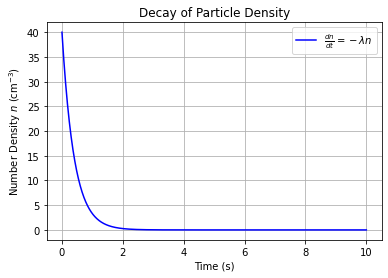

In [56]:
#Q6
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the decay constant and initial conditions
lambda_val = 2.5  # s^-1
n0 = 40.0  # cm^-3

# Define the function representing the differential equation
def decay_equation(n, t):
    return -lambda_val * n

# Create an array of time values from 0 to 10 seconds
t_values = np.linspace(0, 10, 1000)

# Solve the differential equation using odeint
n_values = odeint(decay_equation, n0, t_values)

# Plot the results
plt.plot(t_values, n_values, label=r'$\frac{dn}{dt} = -\lambda n$', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Number Density $n$ (cm$^{-3}$)')
plt.title('Decay of Particle Density')
plt.legend()
plt.grid(True)
plt.show()
